# Yelp Data Challenge - Restaurant Recommender
Patrick 🌰

In [1]:
import graphlab

[WARNING] graphlab.product_key: Unable to write current GraphLab Create license to /Users/lipengyuan/.graphlab/config. Ensure that this user account                         has write permission to /Users/lipengyuan/.graphlab/config to save the license for offline use.
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1544471307.log


This non-commercial license of GraphLab Create for academic use is assigned to li_peng@bentley.edu and will expire on August 01, 2019.


[WARNING] graphlab.deploy._session: Unable to create session in specified location: '/Users/lipengyuan/.graphlab/artifacts'. Using: '/var/tmp/graphlab-lipengyuan/767/tmp_session_71b70dcb-39d8-4740-ad51-fc279e4f9bd9'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

/Users/lipengyuan/anaconda3/envs/gl-env1/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
df = pd.read_csv('pittsrestfinallast2year.csv')

In [7]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,2,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-05,0,isswD5jO3GwCYIkDNK9AEA,4,I love the white pizza and the Monongahela (bl...,0,D5_iQw0N9wO7kT7FrT7j6A
1,11,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-07-31,0,CRMppAp7f0GF5pa8sNkV4g,5,love Primanti bros.great food. good service. f...,0,nyzncOg3goSAMK15IijIqA
2,12,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-03-25,0,BdGR_xduQ2CLkEIgtR2eCQ,4,Great food and very convenient location. The p...,0,YFRp9i9sDuA1T5oMKq5cbg
3,18,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-12-31,0,Jt2iThRe8Fu6GAG-moAIPQ,3,I love visiting Primanti Bros every time we co...,0,QqdHAP9tSwjteG7b9q7sAw
4,20,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-09-27,0,1mi5-2nKgRQ0u6KoWXA3vQ,5,You can't beat their happy hour! Great sandwic...,0,4qfMMlGtme2RNFqDgxYLxg


## 1. Clean data and get rating data 

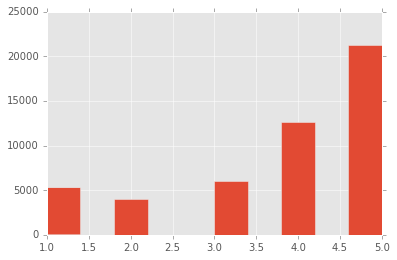

In [8]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]
# stars distribution
df_stars['stars'].hist()

In [9]:
df_stars['business_id'].nunique() 
# number of unique elements

1769

In [10]:
# number of unique user_id
df_stars['user_id'].nunique()

21520

In [11]:
# user comments counts
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head(20)

6Ki3bAL0wx9ymbdJqbSWMA    218
Lfv4hefW1VbvaC2gatTFWA    117
fmzIm7RxEdii5Jz44PtO7g    112
DeXKbQYNx52OlOizobOLJw     97
gofnmwo5ptoEnQI47zCBYg     93
1u80DXuswfp7hFW2NN9B-Q     89
2jKzO_01d12oiu-2bOYcYg     89
-hietrA8M58asfpyJkCyiA     71
7qGe49__QqCpk8ZYOm7W8w     71
pW_XkS9BfbnAQ_JMxNA-8w     65
pspJkQgUOap1OjTZVMbdsQ     65
5IaHGddT0RLq1-S5LbP1iw     64
xhmBgIT3xHgojioDq_c_fg     63
-sv8-a09Psq5CMzmg6E4OQ     61
d0D7L-vfQDIADolnPAcb9A     60
bmSuFvdMyF66PDUZr9VfoQ     58
3egcdazws_x1wW35jgXfNw     57
hg71CGHy9bwpgY8cGVVg4w     57
JeIVRtZiwUnSP9qR4AmfEQ     57
8AwcaBJjiMpQ__FPxktwwQ     56
Name: user_id, dtype: int64

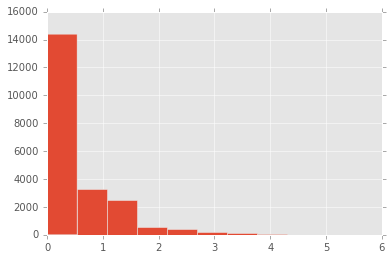

In [12]:
# display log histogram
# df_user_counts.hist()
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender



In [14]:
# how many users only comments once
df_user_counts[df_user_counts == 1].sum()

14383

In [15]:
# users comment over 5 times
df_users = df_user_counts[df_user_counts > 5]
# count users comment over 5 times as active user
df_users.count()

1361

In [16]:
# display active user id
df_users.index

Index([u'6Ki3bAL0wx9ymbdJqbSWMA', u'Lfv4hefW1VbvaC2gatTFWA',
       u'fmzIm7RxEdii5Jz44PtO7g', u'DeXKbQYNx52OlOizobOLJw',
       u'gofnmwo5ptoEnQI47zCBYg', u'1u80DXuswfp7hFW2NN9B-Q',
       u'2jKzO_01d12oiu-2bOYcYg', u'-hietrA8M58asfpyJkCyiA',
       u'7qGe49__QqCpk8ZYOm7W8w', u'pW_XkS9BfbnAQ_JMxNA-8w',
       ...
       u'19kmgZ4dFpRSmPlyeVn9CA', u'lAf9Fx7BWwqRzpEoTYadJA',
       u'b6e7hiRG1PN0QVcZTubAzw', u'0pQonPPPQM2LW1FbrVtOoQ',
       u'vs844SYuQRjULR9oXC0Ckw', u'uNuPyXHbbtHnhWhPLamESQ',
       u'e5H7oAD_txEclZ6oRnZpjw', u'6hplZWMvriP6MbEKKCjlfg',
       u'd8QTcqAe4lingCDsTCsAkw', u'lu7QvOJl-EiaqV0VvNhpWg'],
      dtype='object', length=1361)

In [17]:
# reorder dataframe
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,6Ki3bAL0wx9ymbdJqbSWMA,-8F04F54iDT6VgWPCgybug,4
1,6Ki3bAL0wx9ymbdJqbSWMA,-DUQQsE2QvFIuqO5EiChQA,3
2,6Ki3bAL0wx9ymbdJqbSWMA,-SUammmS2p6c5GuuGA-kmw,4
3,6Ki3bAL0wx9ymbdJqbSWMA,-SX8276QNjtSMu3ZIIcpLA,4
4,6Ki3bAL0wx9ymbdJqbSWMA,-WVF5DKZeEWlMK8Cucto-A,3


In [18]:
df_utility = pd.pivot_table(data=df_stars_cleaned,
                            values='stars', # fill with stars
                            index='user_id', # rows
                            columns='business_id', # columns
                            fill_value=0) # fill missings

In [19]:
df_utility.head()

business_id,--ujyvoQlwVoBgMYtADiLA,-1xCh7Cocn6IwFzhELyohA,-7H-oXvCxJzuT42ky6Db0g,-7PX_FOoCwktlunImRyZdg,-7teXSpi9nqy58WUd-8yfw,-8F04F54iDT6VgWPCgybug,-BuZrOMqgO4OU_UKYSddAg,-CfqFIH6rxUxJL9gR-k_XA,-DUQQsE2QvFIuqO5EiChQA,-FcuxZqsQ0FO35GEXExwjw,...,z_RTK0MaxaRHRQ99hDL2QA,zc0I2evMOPKNuu1mlm_tsQ,zi6cB_bkswWPLD2k3IVtyg,ziJsGjXvidzZWC1I0-SOSg,zjOfUAyqyH_BPe7EkFBrEQ,zkW7OAv8Cnb-3SxEBOubTQ,zuEJKjSkX-4qw8MlEcI0Xg,zuUWG7OdMv6awFRYhEYT5Q,zxSfGIhK3hH3vVz_pS5eaA,zzwhN7x37nyjP0ZM8oiHmw
user_id,,,,,,,,,,,,,,,,,,,,,
-0-hVEpwWEcJLJoGq3rE3g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-ARdx8hOcEWlMDjzwLYZ_g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Ds0hzlQwZUukmOwnapaFg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-FFUshmxcnv3PINbQPDj_g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-Hp15ocusLulN0VpO1rwiw,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# get the list of user id by checking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(1361,)

In [21]:
# get the list of item id by checking out the columns of the utility matrix
item_id_list = df_utility.columns
item_id_list.shape

(1586,)

## recommendation system with graphlab

In [ ]:
import graphlab
# li_peng@bentley.edu
# Product key: EE1C-F268-44A4-8C68-DC7F-E841-76EB-8765
    
# pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/li_peng@bentley.edu/EE1C-F268-44A4-8C68-DC7F-E841-76EB-8765/GraphLab-Create-License.tar.gz

## 2. Item-Item similarity recommender

In [23]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars # SFrame similar to DataFrame

business_id,user_id,stars
--ujyvoQlwVoBgMYtADiLA,D5_iQw0N9wO7kT7FrT7j6A,4
--ujyvoQlwVoBgMYtADiLA,nyzncOg3goSAMK15IijIqA,5
--ujyvoQlwVoBgMYtADiLA,YFRp9i9sDuA1T5oMKq5cbg,4
--ujyvoQlwVoBgMYtADiLA,QqdHAP9tSwjteG7b9q7sAw,3
--ujyvoQlwVoBgMYtADiLA,4qfMMlGtme2RNFqDgxYLxg,5
--ujyvoQlwVoBgMYtADiLA,65GY-LY1Y9OLQ24bk05VYg,4
--ujyvoQlwVoBgMYtADiLA,ynQWcEUSahZ9uegM9kE9Qw,2
--ujyvoQlwVoBgMYtADiLA,qmO1jsUwOSSIE9eAOryuZw,5
--ujyvoQlwVoBgMYtADiLA,0Amd1mZAzHhHMbgKd2RuOg,2
--ujyvoQlwVoBgMYtADiLA,uHyE6oz8dXTYCQ087JQYEA,1


In [26]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,user_id='user_id',
                                                                        item_id='business_id',
                                                                        target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 49142 observations with 21520 users and 1769 items.

Data prepared in: 0.165725s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.643ms                        | 27.75      |

| 11.702ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 33.731ms                            | 0                | 0               |

| 72.307ms                            | 100              | 1769            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.09105s

In [27]:
item_item_rec_result = item_item_rec.recommend(k=3, verbose=False)

In [28]:
item_item_rec_result

user_id,business_id,score,rank
D5_iQw0N9wO7kT7FrT7j6A,q2y2K9RwT954oQGgeNAu1w,0.0192307680845,1
D5_iQw0N9wO7kT7FrT7j6A,5-wiVRTpKwhz2wKxNS-JzA,0.0166122019291,2
D5_iQw0N9wO7kT7FrT7j6A,ts4ZmG1Fde5UfQDDskR5eQ,0.014653109014,3
nyzncOg3goSAMK15IijIqA,5-wiVRTpKwhz2wKxNS-JzA,0.0588235259056,1
nyzncOg3goSAMK15IijIqA,ldGnkfXjRNAxRP9cizgr0Q,0.0526315569878,2
nyzncOg3goSAMK15IijIqA,T-OuUSSzWgrMCv9TUX3epg,0.0526315569878,3
YFRp9i9sDuA1T5oMKq5cbg,5-wiVRTpKwhz2wKxNS-JzA,0.0588235259056,1
YFRp9i9sDuA1T5oMKq5cbg,ldGnkfXjRNAxRP9cizgr0Q,0.0526315569878,2
YFRp9i9sDuA1T5oMKq5cbg,T-OuUSSzWgrMCv9TUX3epg,0.0526315569878,3
QqdHAP9tSwjteG7b9q7sAw,VkeVbH5zcm0MBKuKtytGKw,0.032051295042,1


# 3. Content-based recommender

In [29]:
# group by business_id, then average numerical features

df_average = df.groupby(['business_id']).mean()
df_average.head()

,Unnamed: 0,avg_stars,cool,funny,stars,useful
business_id,,,,,,
--ujyvoQlwVoBgMYtADiLA,36.894737,3.5,0.157895,0.157895,3.421053,0.578947
-1xCh7Cocn6IwFzhELyohA,88.166667,2.5,0.166667,0.166667,3.666667,0.333333
-7H-oXvCxJzuT42ky6Db0g,388.412214,3.5,0.282443,0.160305,3.480916,0.694656
-7PX_FOoCwktlunImRyZdg,704.480769,4.5,0.461538,0.038462,4.615385,0.711538
-7teXSpi9nqy58WUd-8yfw,774.000000,4.5,0.000000,0.000000,5.000000,2.000000


In [30]:
# group by business_id, extract categories data

categories_series = df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--ujyvoQlwVoBgMYtADiLA    [Sandwiches, Sports Bars, Restaurants, Nightli...
-1xCh7Cocn6IwFzhELyohA    [Nightlife, Sports Bars, Restaurants, Mexican,...
-7H-oXvCxJzuT42ky6Db0g    [Bars, Nightlife, Cocktail Bars, American (New...
-7PX_FOoCwktlunImRyZdg    [Food, Specialty Food, Italian, Restaurants, P...
-7teXSpi9nqy58WUd-8yfw                 [Restaurants, American (New), Cafes]
Name: categories, dtype: object

In [31]:
# convert categories data to string remove `[]`
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [32]:
# business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                             columns=categories, 
                             index=categories_series.index)
df_categories.head()

,acos,active,adult,afes,afeteria,affles,african,agels,agents,airports,...,wineries,wing,wings,wrap,wraps,yogur,yogurt,yourself,zakaya,zechuan
business_id,,,,,,,,,,,,,,,,,,,,,
--ujyvoQlwVoBgMYtADiLA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1xCh7Cocn6IwFzhELyohA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7H-oXvCxJzuT42ky6Db0g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7PX_FOoCwktlunImRyZdg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7teXSpi9nqy58WUd-8yfw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=150,
                   random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_series.index)

print(svd.explained_variance_ratio_.sum()) # total variance explained
df_categories_svd.head()

0.938250038005


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--ujyvoQlwVoBgMYtADiLA,1.965961,-0.762370,-0.406660,-0.152930,0.060348,0.173053,-0.142139,-0.222134,-0.254836,0.779986,...,-0.003971,0.011548,-0.005096,-0.009391,-0.014314,-0.017461,0.033660,-0.018718,-0.010219,0.003805
-1xCh7Cocn6IwFzhELyohA,1.187046,-0.238001,-0.820554,0.088202,0.466171,-0.339414,0.039972,-0.268311,0.036976,0.206708,...,-0.004723,-0.004974,0.008918,-0.014448,-0.023058,-0.026966,-0.020443,-0.022162,-0.020728,-0.015912
-7H-oXvCxJzuT42ky6Db0g,1.552564,-1.000806,0.478494,0.875922,-0.095192,0.305422,-0.127449,0.024367,-0.379793,0.501997,...,0.019953,-0.018954,0.012179,0.000152,0.014586,0.014335,0.003982,0.015021,0.008060,-0.014756
-7PX_FOoCwktlunImRyZdg,0.912859,1.151146,-0.410586,-0.051039,-0.018777,-0.109057,-0.065190,-0.275680,-0.142594,0.261228,...,-0.043558,0.034023,0.130169,0.156338,-0.182250,-0.049542,-0.134806,0.024520,0.143511,0.059648
-7teXSpi9nqy58WUd-8yfw,0.745860,-0.335099,1.052080,-0.699081,-0.029562,0.123743,-0.143149,0.053297,-0.685675,0.415664,...,0.036836,0.029547,0.026260,-0.018182,-0.007570,0.008862,0.059905,0.017852,-0.018959,-0.020043


In [34]:
# display feature matrix dimension

print 'df_average : ', df_average.shape
print 'df_categories : ', df_categories.shape
print 'df_categories_svd : ', df_categories_svd.shape

df_average :  (1769, 6)
df_categories :  (1769, 524)
df_categories_svd :  (1769, 150)


In [35]:
# join two to generate feature data for each business_id

df_business = df_average.join(df_categories_svd)

In [37]:
print df_business.shape
df_business.head()

(1769, 156)


,Unnamed: 0,avg_stars,cool,funny,stars,useful,0,1,2,3,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--ujyvoQlwVoBgMYtADiLA,36.894737,3.5,0.157895,0.157895,3.421053,0.578947,1.965961,-0.762370,-0.406660,-0.152930,...,-0.003971,0.011548,-0.005096,-0.009391,-0.014314,-0.017461,0.033660,-0.018718,-0.010219,0.003805
-1xCh7Cocn6IwFzhELyohA,88.166667,2.5,0.166667,0.166667,3.666667,0.333333,1.187046,-0.238001,-0.820554,0.088202,...,-0.004723,-0.004974,0.008918,-0.014448,-0.023058,-0.026966,-0.020443,-0.022162,-0.020728,-0.015912
-7H-oXvCxJzuT42ky6Db0g,388.412214,3.5,0.282443,0.160305,3.480916,0.694656,1.552564,-1.000806,0.478494,0.875922,...,0.019953,-0.018954,0.012179,0.000152,0.014586,0.014335,0.003982,0.015021,0.008060,-0.014756
-7PX_FOoCwktlunImRyZdg,704.480769,4.5,0.461538,0.038462,4.615385,0.711538,0.912859,1.151146,-0.410586,-0.051039,...,-0.043558,0.034023,0.130169,0.156338,-0.182250,-0.049542,-0.134806,0.024520,0.143511,0.059648
-7teXSpi9nqy58WUd-8yfw,774.000000,4.5,0.000000,0.000000,5.000000,2.000000,0.745860,-0.335099,1.052080,-0.699081,...,0.036836,0.029547,0.026260,-0.018182,-0.007570,0.008862,0.059905,0.017852,-0.018959,-0.020043


In [38]:
# prepare data

item_data = graphlab.SFrame(df_business.reset_index())

In [39]:
# build content based recommender

content_rec = graphlab.recommender.item_content_recommender.create(item_data, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['Unnamed: 0', 'avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 1769    | 0.0565291   | 62.072ms     |

| 253          | 447557  | 14.3019     | 1.06s        |

| 506          | 895114  | 28.6037     | 2.07s        |

| 706          | 1248914 | 39.9096     | 3.07s        |

| 967          | 1710623 | 54.6637     | 4.07s        |

| 1218         | 2154642 | 68.8525     | 5.07s        |

| 1513         | 2676497 | 85.5285     | 6.07s        |

| Done         |         | 100         | 6.98s        |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 1769 items.

Data prepared in: 0.556124s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.017742s

In [43]:
sample_item

['--ujyvoQlwVoBgMYtADiLA']

In [42]:
# make recommendation for a single item

sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item) # recommendation from single item

business_id,score,rank
lKom12WnYEjH5FFemK3M1Q,0.897495567799,1
ABiwctEu-OZ8YsVc5lnLZQ,0.885692715645,2
WE7UsbkilPeI8nw9ODnD-g,0.870426177979,3
ehtDfDwcOBghAKAjgWlg4Q,0.844665825367,4
TKDL0wiztnEr_rMkX8ZomQ,0.834016263485,5
JzB7NITHQ7gVHGVZ1ntgIQ,0.830173075199,6
z1nFepEOkn_Bp5aopscf9w,0.827483713627,7
FB33W3bwg3ADcIJOcLLz0w,0.82446295023,8
WXd7r6Yvjxhyo1L6R3lQMA,0.823049008846,9
HFr3uQI9h8sTTvGn3xk5Zg,0.810444414616,10


In [44]:
# similar items per item

similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(30)

,business_id,similar,score,rank
0,--ujyvoQlwVoBgMYtADiLA,lKom12WnYEjH5FFemK3M1Q,0.897496,1
1,--ujyvoQlwVoBgMYtADiLA,ABiwctEu-OZ8YsVc5lnLZQ,0.885693,2
2,--ujyvoQlwVoBgMYtADiLA,WE7UsbkilPeI8nw9ODnD-g,0.870426,3
3,--ujyvoQlwVoBgMYtADiLA,ehtDfDwcOBghAKAjgWlg4Q,0.844666,4
4,--ujyvoQlwVoBgMYtADiLA,TKDL0wiztnEr_rMkX8ZomQ,0.834016,5
5,--ujyvoQlwVoBgMYtADiLA,JzB7NITHQ7gVHGVZ1ntgIQ,0.830173,6
6,--ujyvoQlwVoBgMYtADiLA,z1nFepEOkn_Bp5aopscf9w,0.827484,7
7,--ujyvoQlwVoBgMYtADiLA,FB33W3bwg3ADcIJOcLLz0w,0.824463,8
8,--ujyvoQlwVoBgMYtADiLA,WXd7r6Yvjxhyo1L6R3lQMA,0.823049,9
9,--ujyvoQlwVoBgMYtADiLA,HFr3uQI9h8sTTvGn3xk5Zg,0.810444,10


In [45]:
# make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4] # select favored restuarants
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]

# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort('score',ascending=False).similar[:5]

/Users/lipengyuan/anaconda3/envs/gl-env1/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0    lKom12WnYEjH5FFemK3M1Q
1    ABiwctEu-OZ8YsVc5lnLZQ
2    WE7UsbkilPeI8nw9ODnD-g
3    ehtDfDwcOBghAKAjgWlg4Q
4    TKDL0wiztnEr_rMkX8ZomQ
Name: similar, dtype: object

# 4. Popularity-based recommender

In [46]:
sf_stars

business_id,user_id,stars
--ujyvoQlwVoBgMYtADiLA,D5_iQw0N9wO7kT7FrT7j6A,4
--ujyvoQlwVoBgMYtADiLA,nyzncOg3goSAMK15IijIqA,5
--ujyvoQlwVoBgMYtADiLA,YFRp9i9sDuA1T5oMKq5cbg,4
--ujyvoQlwVoBgMYtADiLA,QqdHAP9tSwjteG7b9q7sAw,3
--ujyvoQlwVoBgMYtADiLA,4qfMMlGtme2RNFqDgxYLxg,5
--ujyvoQlwVoBgMYtADiLA,65GY-LY1Y9OLQ24bk05VYg,4
--ujyvoQlwVoBgMYtADiLA,ynQWcEUSahZ9uegM9kE9Qw,2
--ujyvoQlwVoBgMYtADiLA,qmO1jsUwOSSIE9eAOryuZw,5
--ujyvoQlwVoBgMYtADiLA,0Amd1mZAzHhHMbgKd2RuOg,2
--ujyvoQlwVoBgMYtADiLA,uHyE6oz8dXTYCQ087JQYEA,1


In [47]:
# build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars, 
                                                 user_id = 'user_id', 
                                                 item_id = 'business_id',
                                                 target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 49142 observations with 21520 users and 1769 items.

Data prepared in: 0.109843s

49142 observations to process; with 1769 unique items.

In [48]:
# get recommendation
pop_result = pop_rec.recommend()

recommendations finished on 1000/21520 queries. users per second: 89214

recommendations finished on 2000/21520 queries. users per second: 92267.9

recommendations finished on 3000/21520 queries. users per second: 95280.4

recommendations finished on 4000/21520 queries. users per second: 101559

recommendations finished on 5000/21520 queries. users per second: 101562

recommendations finished on 6000/21520 queries. users per second: 104335

recommendations finished on 7000/21520 queries. users per second: 104778

recommendations finished on 8000/21520 queries. users per second: 104653

recommendations finished on 9000/21520 queries. users per second: 105834

recommendations finished on 10000/21520 queries. users per second: 104392

recommendations finished on 11000/21520 queries. users per second: 104865

recommendations finished on 12000/21520 queries. users per second: 105227

recommendations finished on 13000/21520 queries. users per second: 106909

recommendations finished on 14000/21520 queries. users per second: 104770

recommendations finished on 15000/21520 queries. users per second: 105398

recommendations finished on 16000/21520 queries. users per second: 105623

recommendations finished on 17000/21520 queries. users per second: 106204

recommendations finished on 18000/21520 queries. users per second: 91607.2

recommendations finished on 19000/21520 queries. users per second: 87108.8

recommendations finished on 20000/21520 queries. users per second: 84629.6

recommendations finished on 21000/21520 queries. users per second: 82584.5

In [49]:
pop_result.print_rows(num_rows=30, num_columns=3)

+------------------------+------------------------+-------+-----+
|        user_id         |      business_id       | score | ... |
+------------------------+------------------------+-------+-----+
| D5_iQw0N9wO7kT7FrT7j6A | 56worzbzO-fnU-0WDuabQg |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 3ybsKWA03f16v4OPC0jApg |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 3ed7T7HvUJUnPf6jDmys9A |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 2NLyAZne2fH5zTHSBin92A |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 1yQvJ-By1zO7HzSYhSlz1w |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 1n8bvxpBoUOAJsC5csuV3Q |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 0aT7sqTIIv5zMApt4p4VWQ |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 0OkfU0vDBprsIEd5hWuhAQ |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | 0IfrcGbFzQvn9w8bl9GKDg |  5.0  | ... |
| D5_iQw0N9wO7kT7FrT7j6A | -7teXSpi9nqy58WUd-8yfw |  5.0  | ... |
| nyzncOg3goSAMK15IijIqA | 56worzbzO-fnU-0WDuabQg |  5.0  | ... |
| nyzncOg3goSAMK15IijIqA | 3ybsKWA03f16v4OPC0jApg |  5.0  | ... |
| nyzncOg3